# Azted G-dDT Test Run

In [12]:
import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
sim_df = pd.read_pickle('../data/simulations/psuu-run-2024-03-11_21-29-11.pkl.gz')

<Axes: xlabel='time_l1'>

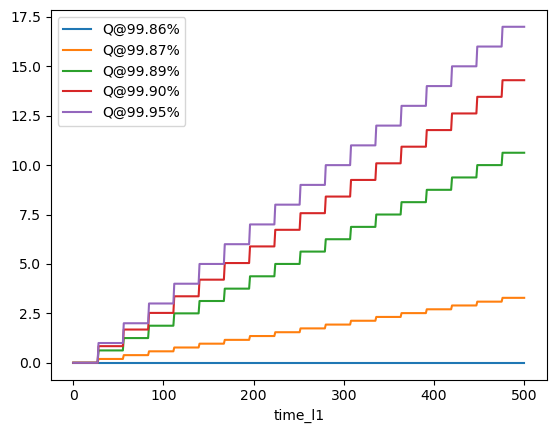

In [65]:
def rename(newname):
    def decorator(f):
        f.__name__ = newname
        return f
    return decorator

def q_at(y):
    @rename(f'Q@{y:0.2%}')
    def q(x):
        return x.quantile(y)
    return q

sim_df.groupby('time_l1').finalized_blocks_count.agg([q_at(0.9986), q_at(0.9987), q_at(0.9989), q_at(0.9990), q_at(0.9995)]).plot()